In [1]:
# Now we are going to performe a random walk on the graph
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import networkx as nx

print("Creating the graph")
# Create a NumPy array
data = np.array([
    ['Alice', 25, 'New York', [3]],
    ['Bob', 30, 'Los Angeles' ,[3]],
    ['Charlie', 35, 'Chicago', [1,2,4]],
    ['David', 40, 'Houston', [3,5,6]],
    ['Emily', 45, 'Phoenix', [4]],
    ['Frank', 50, 'Philadelphia', [4]]
],dtype=object)

# Create a DataFrame from the NumPy array
df = pd.DataFrame(data, columns=['name','age','city','friends'])
df

Creating the graph


,name,age,city,friends
0,Alice,25,New York,[3]
1,Bob,30,Los Angeles,[3]
2,Charlie,35,Chicago,"[1, 2, 4]"
3,David,40,Houston,"[3, 5, 6]"
4,Emily,45,Phoenix,[4]
5,Frank,50,Philadelphia,[4]


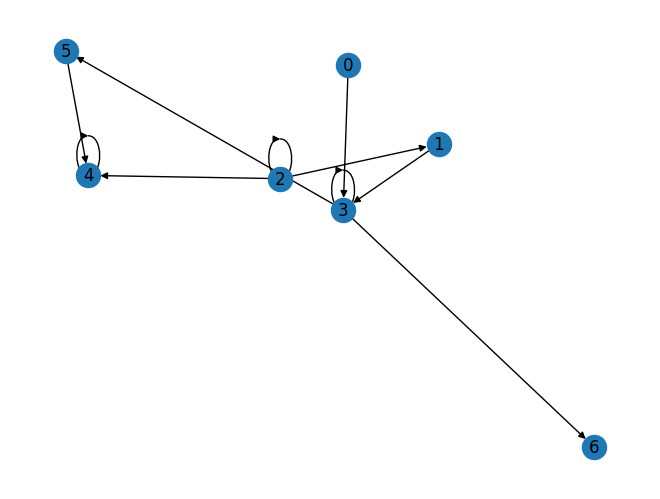

In [2]:
# vamos a crear un grafo a partir de un dataframe
# el origen será el indice de la fila y el destino serán los amigos
# de la columna friends
import networkx as nx
G = nx.DiGraph()
for i, row in df.iterrows():
    G.add_node(i)
    for friend in row['friends']:
        G.add_edge(i, friend)
nx.draw(G, with_labels=True)
plt.show()

In [3]:
# Asi funciona un diccionario en python
diccionario = {'a': 1, 'b': 2, 'c': 3}
print(diccionario['a']) # This gives as a output: 1
diccionario['a'] = 10
print(diccionario['a']) # This gives as a output: 10
diccionario['d'] = 4
print(diccionario['d']) # This gives as a output: 4
print(diccionario) # This gives as a output: {'a': 10, 'b': 2, 'c': 3, 'd': 4}
del diccionario['a']
print(diccionario) # This gives as a output: {'b': 2, 'c': 3, 'd': 4}
print('a' in diccionario) # This gives as a output: False
print('b' in diccionario) # This gives as a output: True
# Tambien podemos cambiar el nombre de las claves
diccionario['b'] = 20
print(diccionario) # This gives as a output: {'b': 20, 'c': 3, 'd': 4}
diccionario['e'] = diccionario.pop('d')
print(diccionario) # This gives as a output: {'b': 20, 'c': 3, 'e': 4}

1
10
4
{'a': 10, 'b': 2, 'c': 3, 'd': 4}
{'b': 2, 'c': 3, 'd': 4}
False
True
{'b': 20, 'c': 3, 'd': 4}
{'b': 20, 'c': 3, 'e': 4}


In [4]:
def bfs_numpy(graph, source, target):
    """
    Implementation of BFS using NumPy and standard Python lists
    
    Parameters:
    - graph: NetworkX graph (undirected, unweighted)
    - source: Source node
    - target: Target node
    
    Returns:
    - steps: Number of steps needed to find the solution
    - visited_nodes: List of nodes visited in order
    - shortest_path: List of nodes in the shortest path from source to target
    """
    # Get the list of nodes in the graph
    nodes = list(graph.nodes())
    
    # Get adjacency matrix directly from NetworkX
    adjacency_matrix = nx.to_numpy_array(graph, nodelist=nodes)
    
    # Initialize array to track visited nodes
    visited = np.zeros(len(nodes), dtype=bool)
    
    # Find index of source and target nodes
    source_index = nodes.index(source)
    target_index = nodes.index(target)
    
    # Mark source as visited
    visited[source_index] = True
    
    # Initialize the list of nodes to explore
    to_explore = [source_index]
    # Index to keep track of the current position in the to_explore list
    current_position = 0
    
    # Array to store the parent of each node (-1 means no parent)
    # This will allow us to reconstruct the shortest path
    #parent = np.full(len(nodes), -1)# Np.full crea un array de numpy con el valor que le pasemos en el segundo argumento, en este caso -1
    parent = np.ones(len(nodes), dtype=int) * -1 # Otra forma de hacer lo mismo que arriba
    
    # Step counter
    steps = 0
    
    # BFS loop - continue until we've explored all nodes or found the target
    while current_position < len(to_explore):
        steps += 1
        
        # Get the current node to explore (FIFO approach - first in, first out)
        current_index = to_explore[current_position]
        current_position += 1
        
        # If we reach the target, we're done
        if current_index == target_index:
            break
        
        # Find all neighbors (nodes with a connection in the adjacency matrix)
        neighbors = np.where(adjacency_matrix[current_index] == 1)[0]
        
        # Process each neighbor
        for neighbor_index in neighbors:
            if not visited[neighbor_index]:
                # Mark as visited
                visited[neighbor_index] = True
                # Add to exploration list
                to_explore.append(neighbor_index)
                # Record the parent node (essential for reconstructing the path)
                parent[neighbor_index] = current_index
    
    # Reconstruct the shortest path from source to target
    shortest_path = []
    if parent[target_index] != -1 or source_index == target_index:  # Check if path exists
        # Start from the target and work backwards
        current = target_index
        while current != -1:
            shortest_path.insert(0, nodes[current])  # Insert at the beginning
            current = parent[current]
    
    return steps, shortest_path

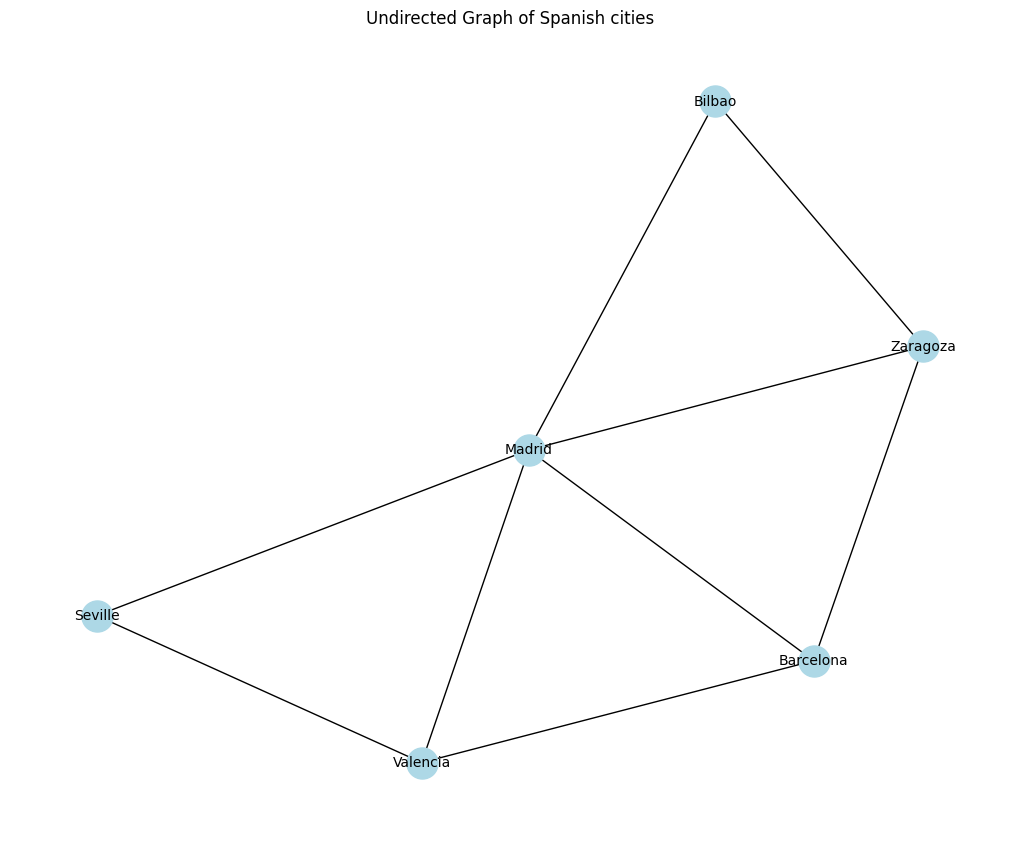

In [5]:
def create_example_graph():
    """Creates an example undirected graph for testing"""
    G = nx.Graph()
    
    # Add nodes (cities)
    cities = ['Madrid', 'Barcelona', 'Valencia', 'Seville', 'Bilbao', 'Zaragoza']
    G.add_nodes_from(cities)
    
    # Add edges (no weights)
    edges = [
        ('Madrid', 'Barcelona'),
        ('Madrid', 'Valencia'),
        ('Madrid', 'Seville'),
        ('Madrid', 'Bilbao'),
        ('Madrid', 'Zaragoza'),
        ('Barcelona', 'Valencia'),
        ('Barcelona', 'Zaragoza'),
        ('Valencia', 'Seville'),
        ('Zaragoza', 'Bilbao')
    ]
    
    # Add the edges
    G.add_edges_from(edges)
    
    return G

# Create and visualize the graph
G = create_example_graph()

# Visualize the graph
pos = nx.spring_layout(G, seed=42)  # Node positioning
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
plt.title("Undirected Graph of Spanish cities")
plt.show()

In [6]:
# Define source and target nodes
source = 'Bilbao'
target = 'Sevilla'

# Compare with NetworkX
path = nx.shortest_path(G, source, target)
print(f"\nNetworkX result:")
print(f"Shortest path: {path}")
print(f"Path length: {len(path) - 1} edges")

# Run BFS
bfs_steps, path = bfs_numpy(G, source, target)
print(f"BFS Path from {source} to {target}:")
print(f"Number of steps: {bfs_steps}")
print(f"Shortest path: {path}")
print(f"Path length: {len(path) - 1} edges")

NodeNotFound: Either source Bilbao or target Sevilla is not in G

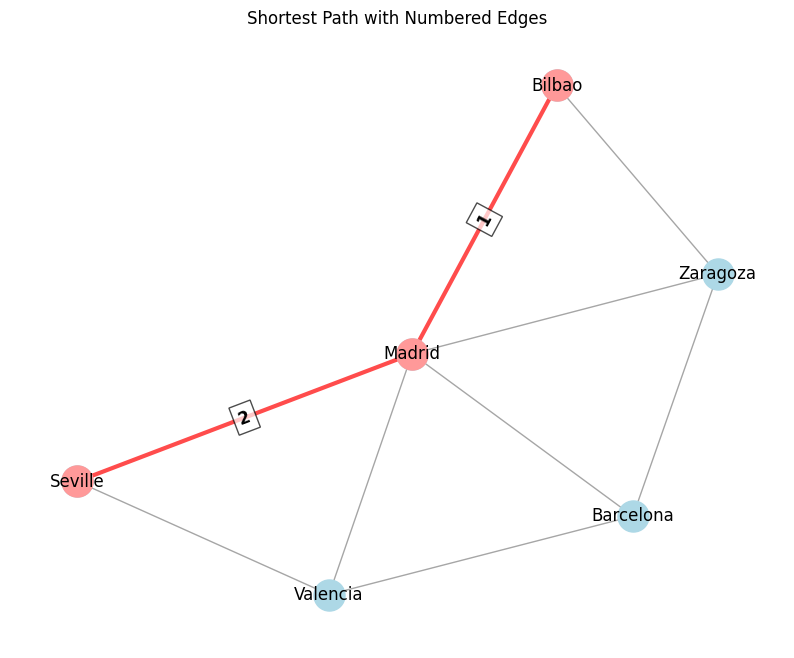

In [25]:
def visualize_shortest_path(G, shortest_path, title):
    """Visualizes the shortest path with numbered edges using edge labels"""
    plt.figure(figsize=(10, 8))
    
    # Create a copy of the graph for visualization
    H = G.copy()
    pos = nx.spring_layout(H, seed=42)
    
    # Create the edges of the shortest path
    edge_colors = []
    edge_widths = []
    
    # Create edge labels dictionary for the shortest path edges
    edge_labels = {}
    
    # Process all edges and mark the shortest path edges
    for u, v in H.edges():
        if len(shortest_path) > 1:
            # Check if this edge is part of the shortest path
            is_path_edge = False
            for i in range(len(shortest_path) - 1):
                if (u == shortest_path[i] and v == shortest_path[i+1]) or \
                   (v == shortest_path[i] and u == shortest_path[i+1]):  # For undirected graphs
                    is_path_edge = True
                    # Add label with the step number
                    edge_labels[(u, v)] = str(i + 1)
                    break
            
            if is_path_edge:
                edge_colors.append('red')
                edge_widths.append(3.0)
            else:
                edge_colors.append('gray')
                edge_widths.append(1.0)
        else:
            edge_colors.append('gray')
            edge_widths.append(1.0)
    
    # Draw all nodes
    nx.draw_networkx_nodes(H, pos, node_color='lightblue', node_size=500)
    
    # Highlight the nodes in the shortest path
    nx.draw_networkx_nodes(H, pos, nodelist=shortest_path, node_color='#ff9999', node_size=500)
    
    # Draw all edges with appropriate colors and widths
    nx.draw_networkx_edges(H, pos, edge_color=edge_colors, width=edge_widths, alpha=0.7)
    
    # Draw edge labels (numbers) for the shortest path
    nx.draw_networkx_edge_labels(H, pos, edge_labels=edge_labels, font_size=12, 
                                font_weight='bold', bbox=dict(facecolor='white', alpha=0.7))
    
    # Draw node labels
    nx.draw_networkx_labels(H, pos)
    
    plt.title(title)
    plt.axis('off')
    plt.show()

# Visualize the shortest path with numbered edges
visualize_shortest_path(G, path, "Shortest Path with Numbered Edges")

In [26]:
def test_multiple_targets(G, source, target_list):
    """Tests BFS for multiple targets"""
    results = []
    
    for target in target_list:
        steps, visited = bfs_numpy(G, source, target)
        
        # Use NetworkX to get the correct path
        nx_path = nx.shortest_path(G, source, target)
        
        results.append({
            'Source': source,
            'Target': target,
            'Steps': steps,
            'Nodes Visited': len(visited),
            'Path Length': len(nx_path) - 1
        })
    
    # Display results as a table
    print(f"{'Source':<8} {'Target':<10} {'Steps':<8} {'Nodes Visited':<15} {'Path Length':<12}")
    print("-" * 55)
    
    for result in results:
        print(f"{result['Source']:<8} {result['Target']:<10} {result['Steps']:<8} "
              f"{result['Nodes Visited']:<15} {result['Path Length']:<12}")

# Test BFS for multiple targets
targets = ['Barcelona', 'Valencia', 'Seville', 'Bilbao', 'Zaragoza']
test_multiple_targets(G, 'Madrid', targets)

Source   Target     Steps    Nodes Visited   Path Length 
-------------------------------------------------------
Madrid   Barcelona  2        2               1           
Madrid   Valencia   3        2               1           
Madrid   Seville    4        2               1           
Madrid   Bilbao     5        2               1           
Madrid   Zaragoza   6        2               1           
